# Understand Problem Statement and Gather Data

It is a dataset that describing Portugal bank marketing campaigns results.
Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marking afforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv('bank.csv',sep=';')

In [5]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
df=df.rename(columns={'emp.var.rate':'emp_var_rate','cons.price.idx':'cons_price_idx','cons.conf.idx':'cons_conf_idx','nr.employed':'nr_employed'})

In [7]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [8]:
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


# Exploratory Data Analysis 

#### Distribution of Target Variable

Text(0.5, 1.0, 'Distribution of Target Variable')

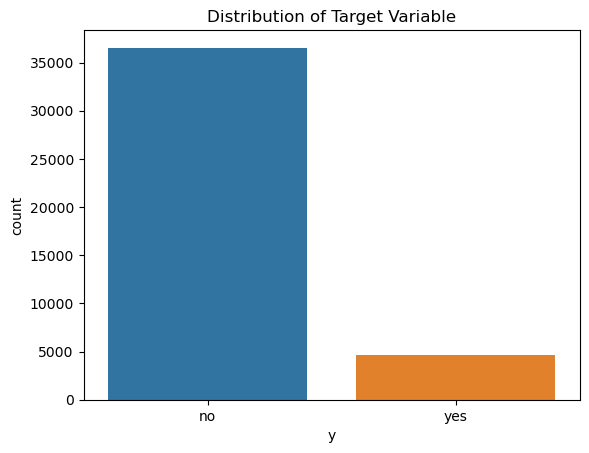

In [9]:
sns.countplot(df.y)
plt.title('Distribution of Target Variable')

Target Variable is highly imbalanced and fromPrevious survey seen that Number of customers are much larger(88.73%) who not subscribed the term deposite than the Number of customers who subscribed the term deposite.(11.27)

### Separating Catelgorical Columns

In [10]:
categorical_cols=list(df.select_dtypes(include='object').columns)
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

### Separating Numerical Columns 

In [11]:
Numerical_cols=list(df.select_dtypes(include=['float','int']).columns)
Numerical_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m',
 'nr_employed']

In [13]:
df.marital.value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [15]:
80*100/41000

0.1951219512195122

# Univariate Anlysis for Categorical Columns

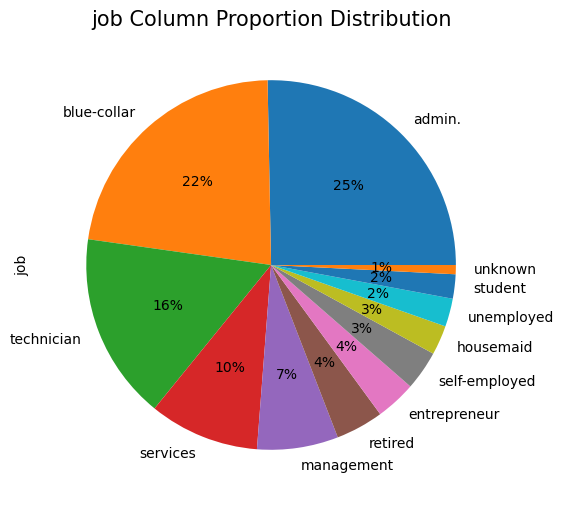

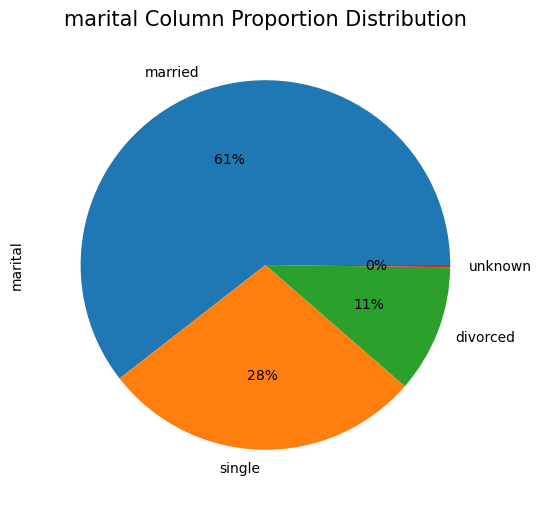

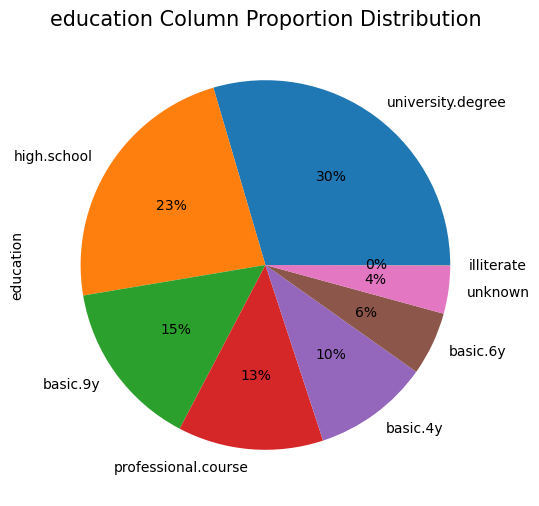

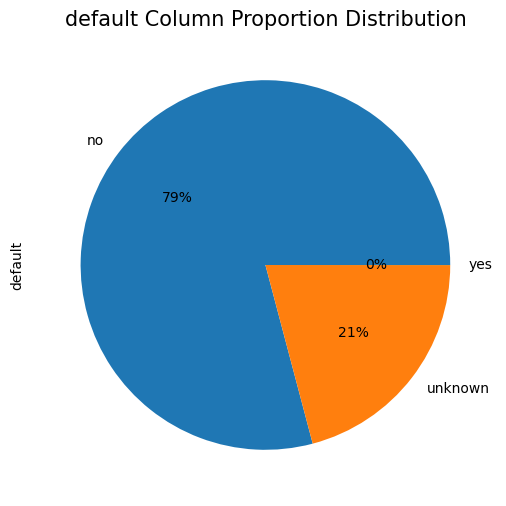

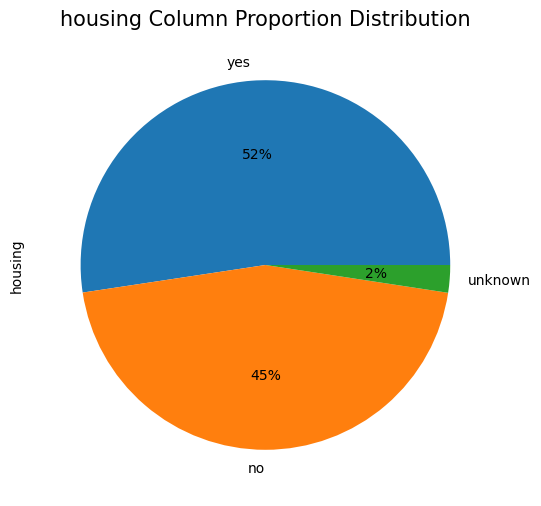

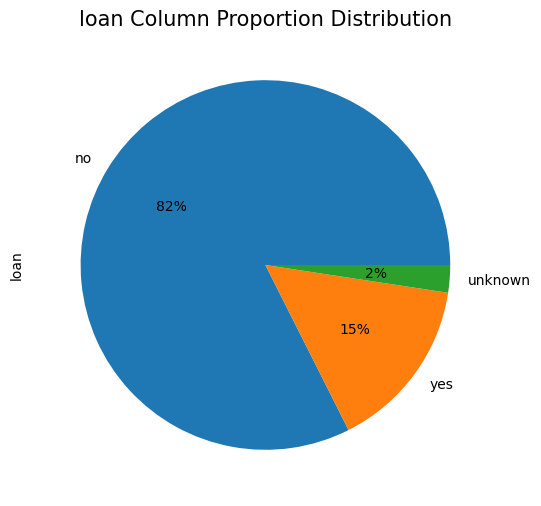

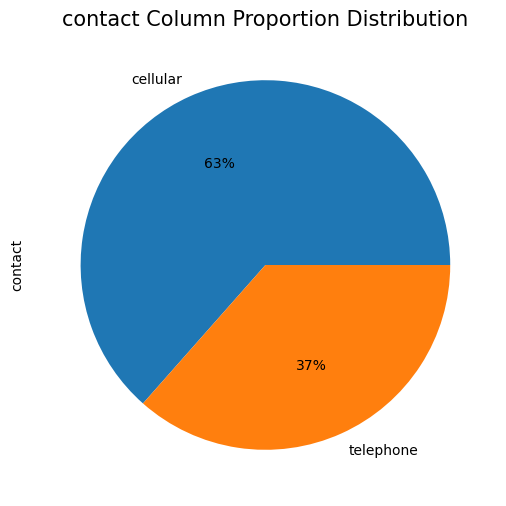

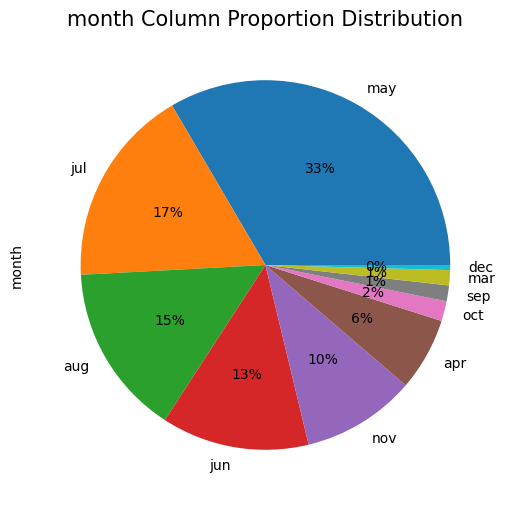

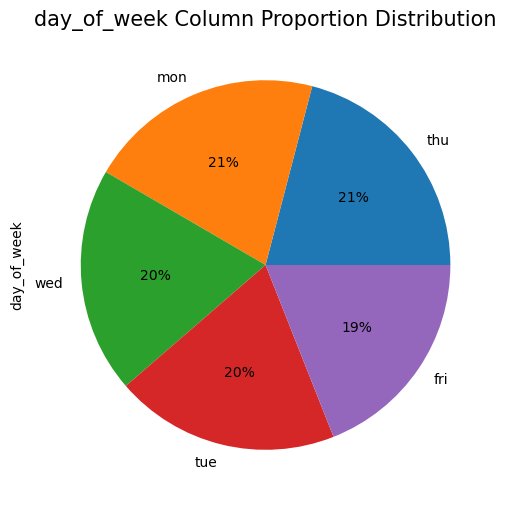

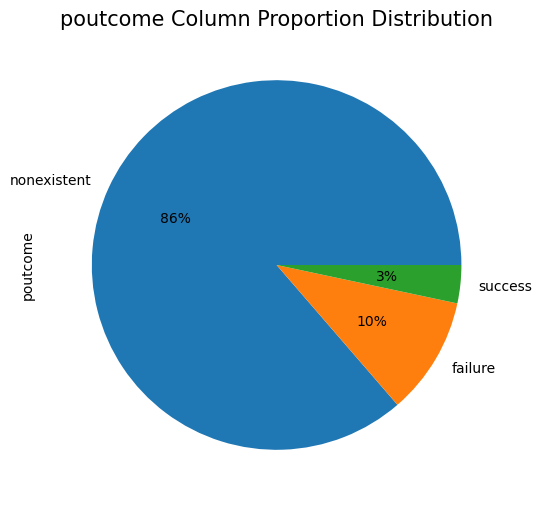

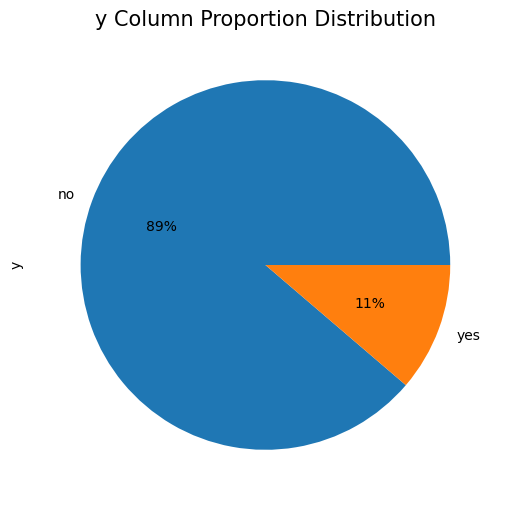

In [12]:
colors = [["Lavender Blush","Turquoise Blue","Magenta Haze",
          "Emerald Green","Goldenrod Yellow","Amethyst Purple",
          "Coral Pink","Teal Ocean","Cherry Blossom Pink","Sunflower Yellow"]]
for i in categorical_cols:
    plt.figure(figsize=(6,6))
    df[i].value_counts().plot(kind='pie',autopct='%.0f%%')
    plt.title(i+' Column Proportion Distribution',fontsize=15)
    

<AxesSubplot:>

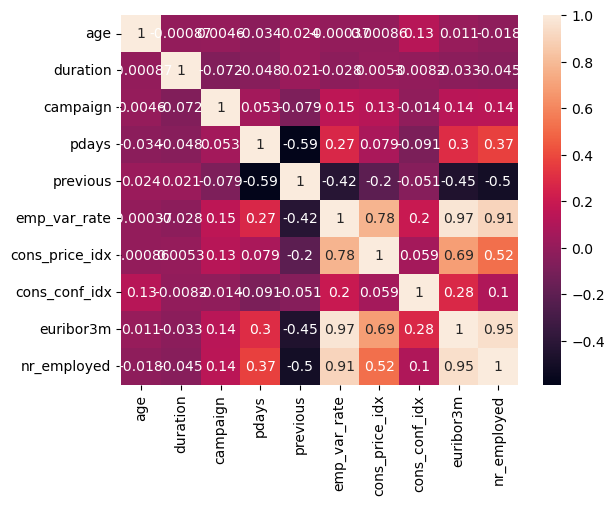

In [21]:
sns.heatmap(df[Numerical_cols].corr(),annot=True)

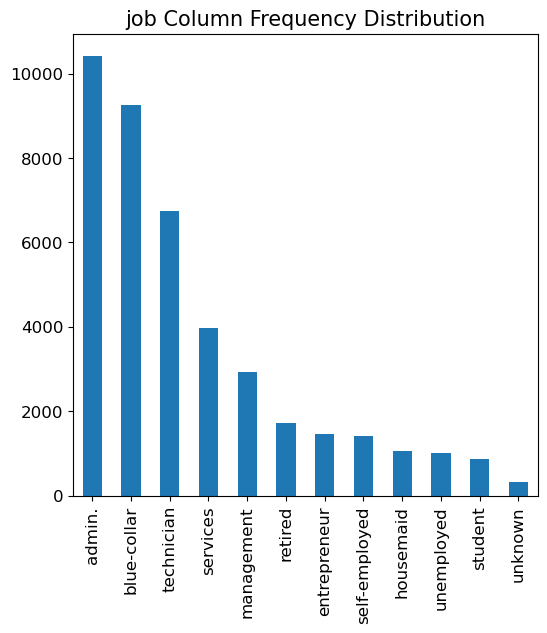

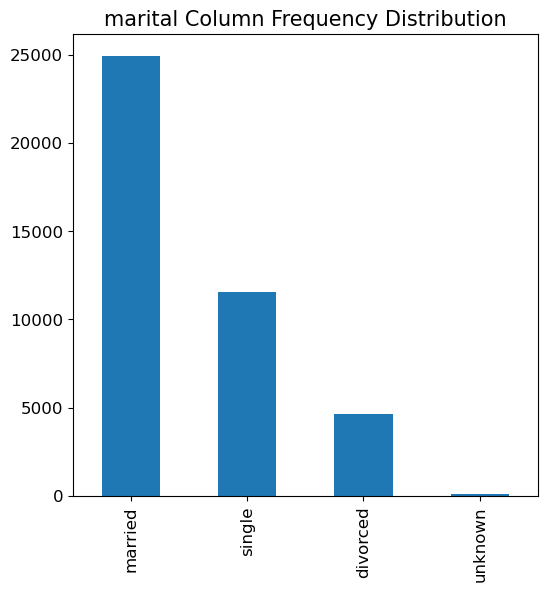

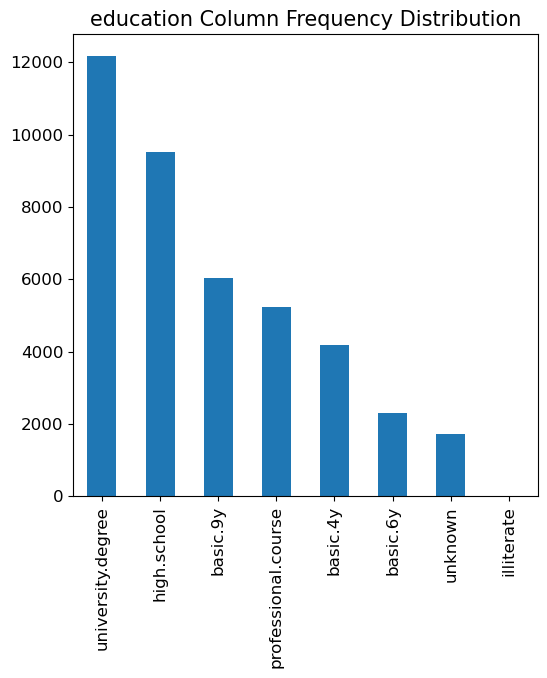

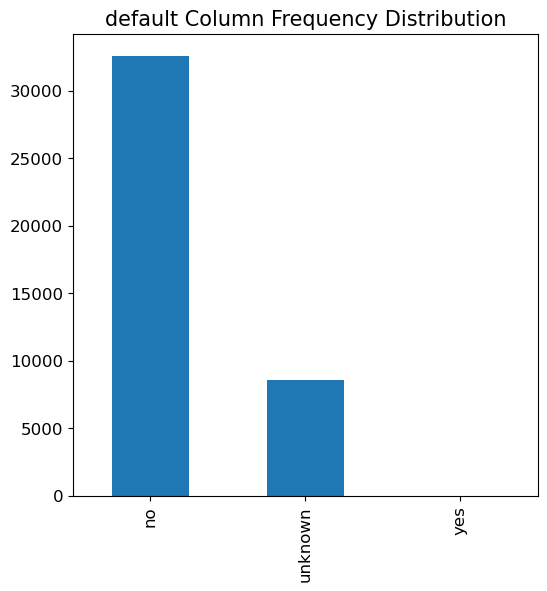

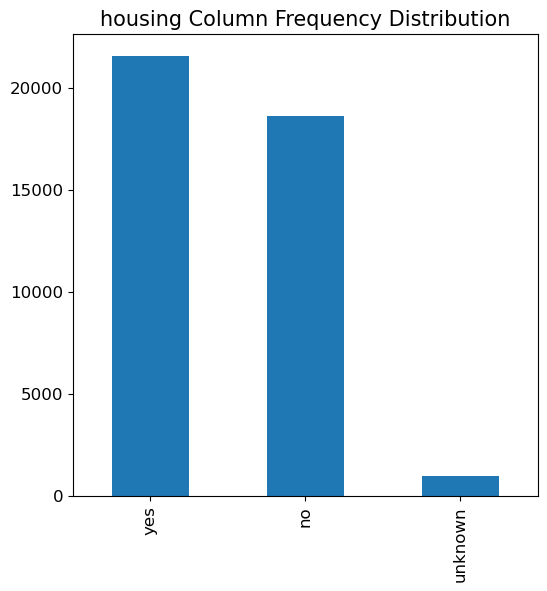

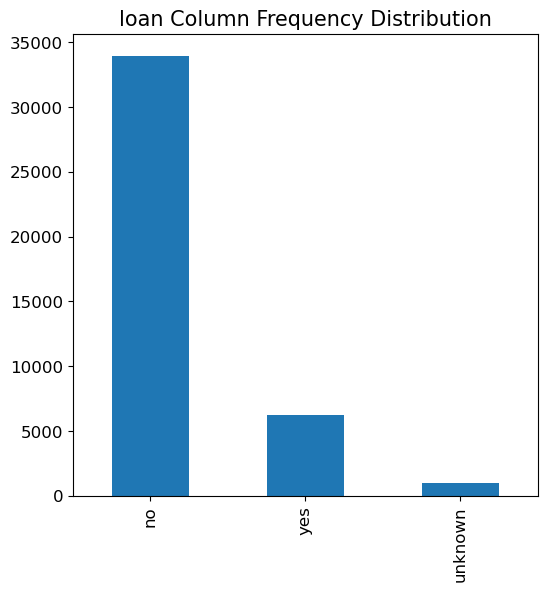

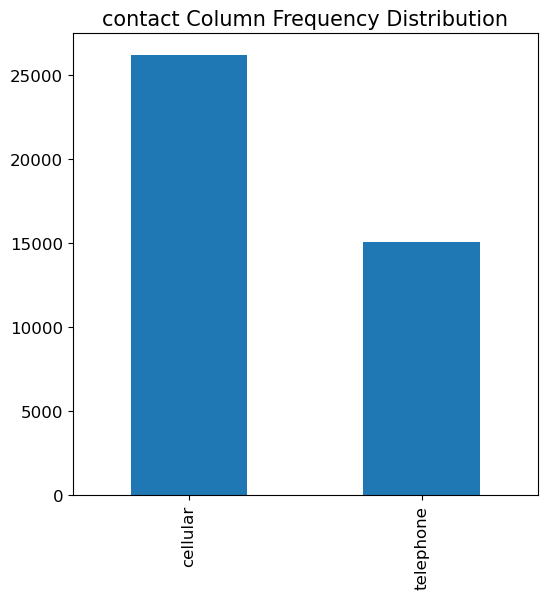

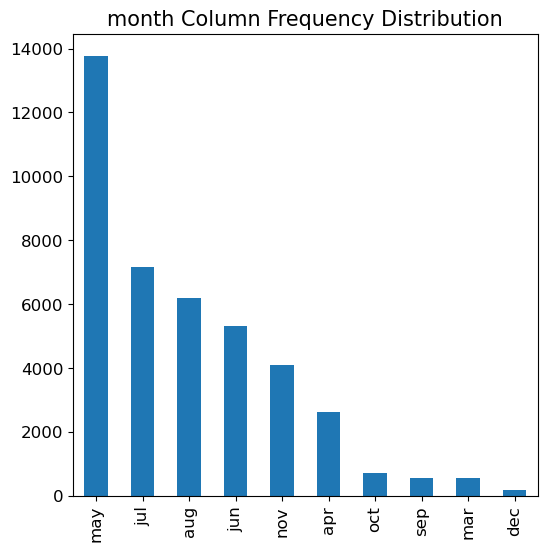

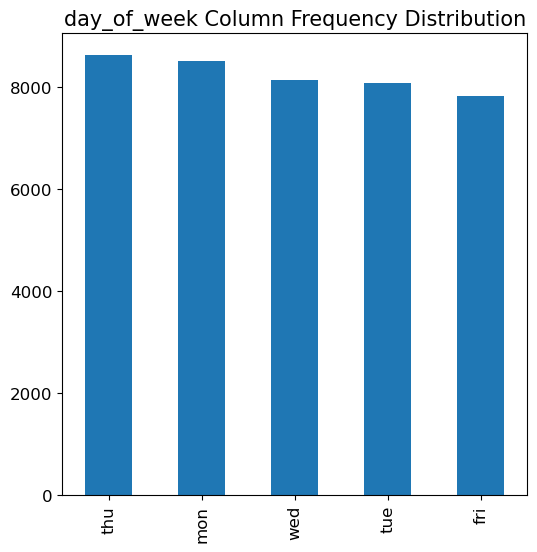

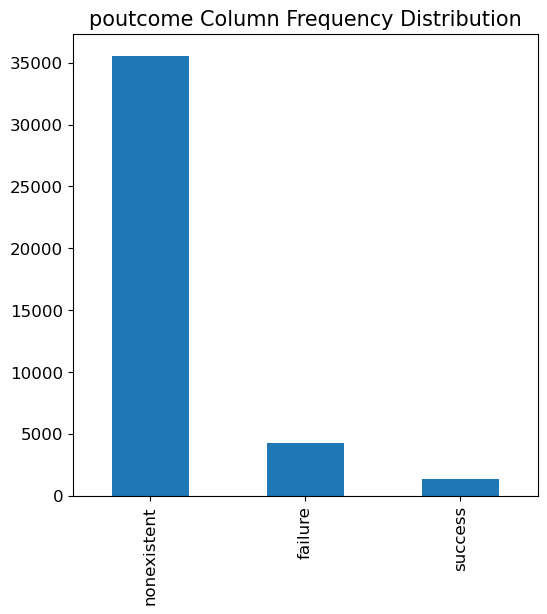

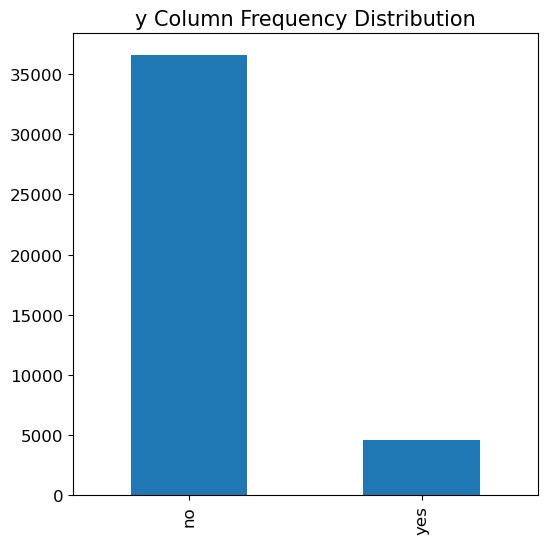

In [13]:
for i in categorical_cols:
    plt.figure(figsize=(6,6))
    df[i].value_counts().plot(kind='bar',fontsize=12)
    plt.title(i+' Column Frequency Distribution',fontsize=15)

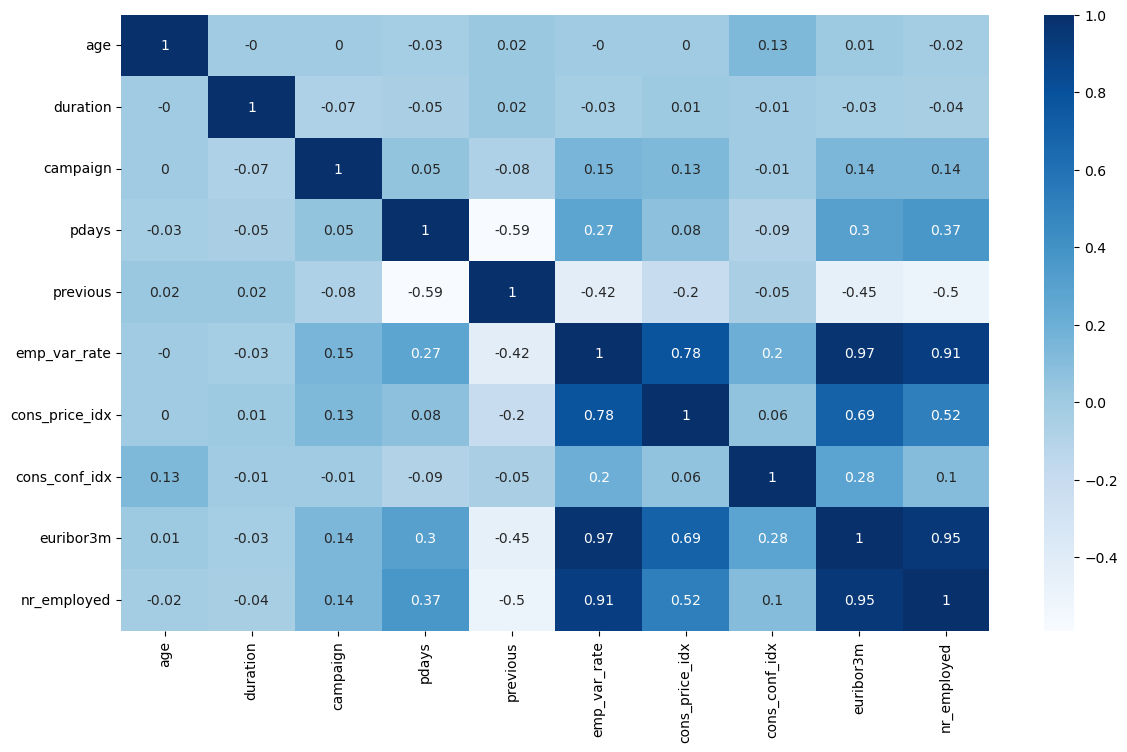

In [26]:
plt.figure(figsize=(14, 8))
sns.heatmap(df[Numerical_cols].corr().round(2), annot=True,cmap='Blues');

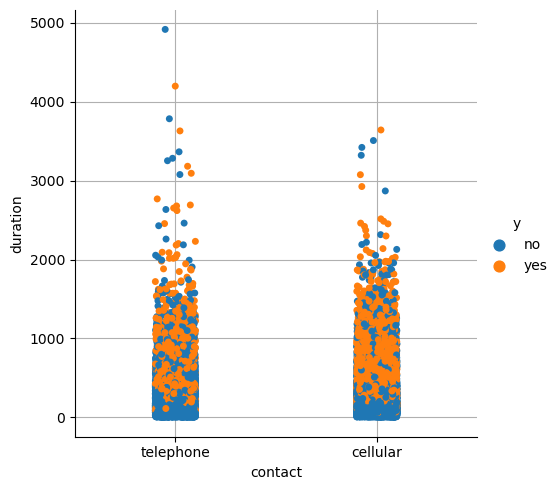

In [15]:
sns.catplot(y='duration',x='contact',data=df,hue='y')
plt.grid()

In [16]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

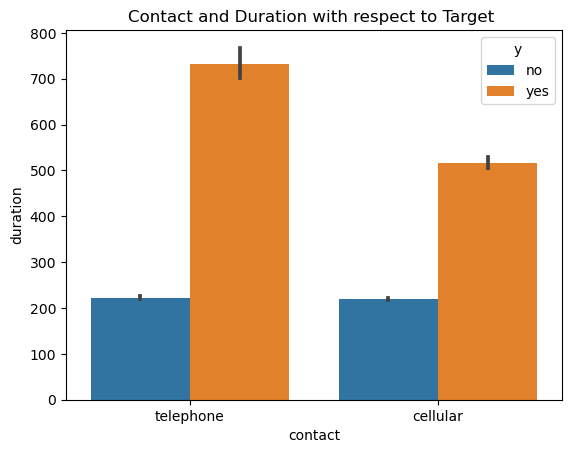

In [17]:
sns.barplot(x='contact',y='duration',data=df,hue='y')
plt.title('Contact and Duration with respect to Target ');

# Data Preprocessing

### Handling Missing Data

In [18]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [19]:
df.replace({' ':np.nan},inplace=True)

In [20]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

In [21]:
df.replace({'?':np.nan},inplace=True)

In [22]:
df.isna().sum()[df.isna().sum()>0]

Series([], dtype: int64)

# Encoding 

###  Selecting Non Numeric Columns

In [23]:
df.select_dtypes(include='object').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [24]:
df.y=df.y.replace({'yes':1,'no':0})

In [25]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [32]:
l1=list(df.select_dtypes(include='object').columns)
print(l1)

for i in l1:
    print('Column Name is:',i)
    print('Unique values in column',i,'are:',df[i].unique(),'\n')
    print('Value Counts are:\n',df[i].value_counts())
    print('\n')
    print('********************************************************')

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
Column Name is: job
Unique values in column job are: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student'] 

Value Counts are:
 admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64


********************************************************
Column Name is: marital
Unique values in column marital are: ['married' 'single' 'divorced' 'unknown'] 

Value Counts are:
 married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64


********************************************************
Column Name is: educ

### Encoding Using Label Encoder 

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[df.select_dtypes(include='object').columns]=df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [36]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[df.select_dtypes(include='object').columns]=df[df.select_dtypes(include='object').columns].apply(le.fit_transform)

In [37]:
#l1=list(df.select_dtypes(include='object').columns)
l1
for i in l1:
    print('Column Name is:',i)
    print('Unique values in column',i,'are:',df[i].unique(),'\n')
    print('Value Counts are:\n',df[i].value_counts())
    print('\n')
    print('********************************************************')

Column Name is: job
Unique values in column job are: [ 3  7  0  1  9  5  4 10  6 11  2  8] 

Value Counts are:
 0     10422
1      9254
9      6743
7      3969
4      2924
5      1720
2      1456
6      1421
3      1060
10     1014
8       875
11      330
Name: job, dtype: int64


********************************************************
Column Name is: marital
Unique values in column marital are: [1 2 0 3] 

Value Counts are:
 1    24928
2    11568
0     4612
3       80
Name: marital, dtype: int64


********************************************************
Column Name is: education
Unique values in column education are: [0 3 1 2 5 7 6 4] 

Value Counts are:
 6    12168
3     9515
2     6045
5     5243
0     4176
1     2292
7     1731
4       18
Name: education, dtype: int64


********************************************************
Column Name is: default
Unique values in column default are: [0 1 2] 

Value Counts are:
 0    32588
1     8597
2        3
Name: default, dtype: int64


****

In [29]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


# Define X or Features or Independent variables  

In [30]:
x=df.drop('y',axis=1)

In [31]:
x.shape

(41188, 20)

# Define Y or Target or Dependent variable

In [32]:
y=df.y

In [33]:
y.shape

(41188,)

# Splitting Data into Training and Testing

In [34]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=345)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((32950, 20), (8238, 20), (32950,), (8238,))

# Handling Imbalanced Data Using SMOTE 

Text(0.5, 1.0, 'Visual Representation of Data Disproportion')

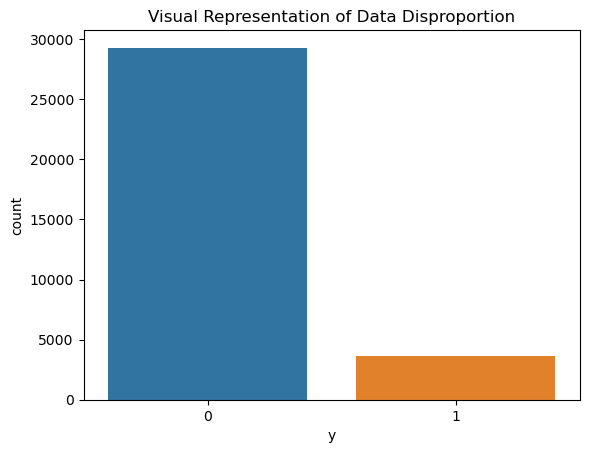

In [35]:
sns.countplot(y_train)
plt.title('Visual Representation of Data Disproportion')

In [36]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()

In [37]:
x_train,y_train=sm.fit_resample(x_train,y_train)

Text(0.5, 1.0, 'Visual Representation of Data Disproportion')

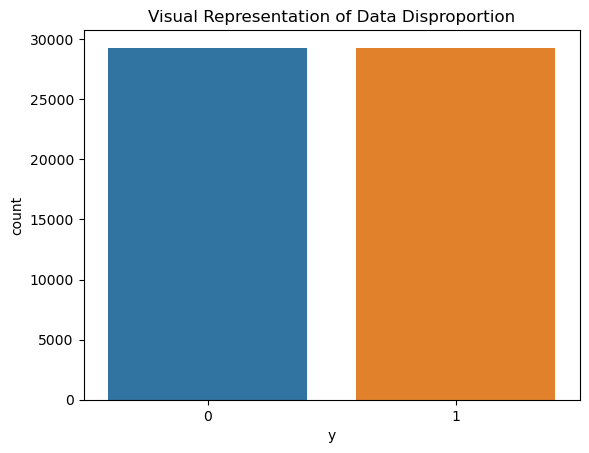

In [38]:
sns.countplot(y_train)
plt.title('Visual Representation of Data Disproportion')

# Standardize the Dataset 

In [39]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [40]:
x_train=sc.fit_transform(x_train)

In [41]:
x_test=sc.fit_transform(x_test)

# Feature Selection Using Random Forest

# Model Building on All Columns

In [42]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Accuracy for Logistic Regression Model is:',accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Recall Score (TPR) score:',recall_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Precision Score:',precision_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('F1 score:',f1_score(y_test,y_pred))

Confusion Matrix 
 [[6270  993]
 [ 203  772]]
-------------------------------------------------------------------------------------------
Accuracy for Logistic Regression Model is: 0.8548191308570041
-------------------------------------------------------------------------------------------
Recall Score (TPR) score: 0.7917948717948718
-------------------------------------------------------------------------------------------
Precision Score: 0.43739376770538246
-------------------------------------------------------------------------------------------
F1 score: 0.5635036496350365


In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Accuracy for Random Forest Classifier Model is:',accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Recall Score (TPR) score:',recall_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Precision Score:',precision_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('F1 score:',f1_score(y_test,y_pred))

Confusion Matrix 
 [[6711  552]
 [ 300  675]]
-------------------------------------------------------------------------------------------
Accuracy for Random Forest Classifier Model is: 0.8965768390386016
-------------------------------------------------------------------------------------------
Recall Score (TPR) score: 0.6923076923076923
-------------------------------------------------------------------------------------------
Precision Score: 0.5501222493887531
-------------------------------------------------------------------------------------------
F1 score: 0.6130790190735695


In [44]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Accuracy for Decision Tree Classifier Model is:',accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Recall Score (TPR) score:',recall_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Precision Score:',precision_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('F1 score:',f1_score(y_test,y_pred))

Confusion Matrix 
 [[6517  746]
 [ 379  596]]
-------------------------------------------------------------------------------------------
Accuracy for Decision Tree Classifier Model is: 0.8634377276037873
-------------------------------------------------------------------------------------------
Recall Score (TPR) score: 0.6112820512820513
-------------------------------------------------------------------------------------------
Precision Score: 0.44411326378539495
-------------------------------------------------------------------------------------------
F1 score: 0.5144583513163574


# All Models After Feature Selection By Random Forest

In [45]:
fea_imp=pd.DataFrame()
fea_imp['Feature']=x.columns
fea_imp['Importance']=rfc.feature_importances_
fea_imp=fea_imp.sort_values('Importance',ascending=False)
fea_imp=fea_imp[fea_imp.Importance>0.02]
fea_imp

,Feature,Importance
10,duration,0.348363
18,euribor3m,0.106943
19,nr_employed,0.079975
17,cons_conf_idx,0.059956
15,emp_var_rate,0.051221
16,cons_price_idx,0.041923
7,contact,0.040458
0,age,0.038742
8,month,0.029174
1,job,0.023924


In [46]:
l1=list(fea_imp.Feature)
l1

['duration',
 'euribor3m',
 'nr_employed',
 'cons_conf_idx',
 'emp_var_rate',
 'cons_price_idx',
 'contact',
 'age',
 'month',
 'job',
 'education',
 'day_of_week',
 'default',
 'housing']

In [47]:
l1.append('y')

In [48]:
df1=df.loc[:,l1]

In [49]:
x=df.drop('y',axis=1)
y=df.y

In [50]:
df.y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=345)
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_train,y_train=sm.fit_resample(x_train,y_train)

In [52]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Accuracy for Logistic Regression Model is:',accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Recall Score (TPR) score:',recall_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Precision Score:',precision_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('F1 score:',f1_score(y_test,y_pred))

Confusion Matrix 
 [[6150 1113]
 [ 156  819]]
-------------------------------------------------------------------------------------------
Accuracy for Logistic Regression Model is: 0.8459577567370721
-------------------------------------------------------------------------------------------
Recall Score (TPR) score: 0.84
-------------------------------------------------------------------------------------------
Precision Score: 0.42391304347826086
-------------------------------------------------------------------------------------------
F1 score: 0.5634674922600619


In [53]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Accuracy for Random Forest Classifier Model is:',accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Recall Score (TPR) score:',recall_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Precision Score:',precision_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('F1 score:',f1_score(y_test,y_pred))

Confusion Matrix 
 [[6841  422]
 [ 362  613]]
-------------------------------------------------------------------------------------------
Accuracy for Random Forest Classifier Model is: 0.9048312697256615
-------------------------------------------------------------------------------------------
Recall Score (TPR) score: 0.6287179487179487
-------------------------------------------------------------------------------------------
Precision Score: 0.5922705314009662
-------------------------------------------------------------------------------------------
F1 score: 0.6099502487562188


In [54]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Accuracy for Decision Tree Classifier Model is:',accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Recall Score (TPR) score:',recall_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Precision Score:',precision_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('F1 score:',f1_score(y_test,y_pred))

Confusion Matrix 
 [[6712  551]
 [ 417  558]]
-------------------------------------------------------------------------------------------
Accuracy for Decision Tree Classifier Model is: 0.8824957513959699
-------------------------------------------------------------------------------------------
Recall Score (TPR) score: 0.5723076923076923
-------------------------------------------------------------------------------------------
Precision Score: 0.503155996393147
-------------------------------------------------------------------------------------------
F1 score: 0.5355086372360844


# Hyperparamter Tunning for Random Forest 

In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score,make_scorer
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}
precision_scorer = make_scorer(precision_score, average='binary')

rf_model = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring=precision_scorer, n_jobs=-1,verbose=2)
grid_search.fit(x_train, y_train)
best_params = grid_search.best_params_

Fitting 5 folds for each of 54 candidates, totalling 270 fits


In [56]:
best_params = grid_search.best_params_
best_precision = grid_search.best_score_

In [57]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

In [58]:
precision_test = precision_score(y_test, y_pred)
print("Precision on Test Set:", precision_test)

Precision on Test Set: 0.6015779092702169


In [59]:
best_model = grid_search.best_estimator_
best_model.fit(x_train, y_train)
accuracy = best_model.score(x_test, y_test)
print("Best Hyperparameters:", best_params)
print("Test Accuracy:", accuracy)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Test Accuracy: 0.9062879339645545


In [60]:
precision_test = precision_score(y_test, y_pred)
print("Precision on Test Set:", precision_test)

Precision on Test Set: 0.6015779092702169


In [61]:
y_pred=best_model.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Accuracy for Random Forest Classifier Model is:',accuracy_score(y_test,y_pred)*100)
print('-------------------------------------------------------------------------------------------')
print('Recall Score (TPR) score:',recall_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Precision Score:',precision_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('F1 score:',f1_score(y_test,y_pred))

Confusion Matrix 
 [[6846  417]
 [ 355  620]]
-------------------------------------------------------------------------------------------
Accuracy for Random Forest Classifier Model is: 90.62879339645545
-------------------------------------------------------------------------------------------
Recall Score (TPR) score: 0.6358974358974359
-------------------------------------------------------------------------------------------
Precision Score: 0.5978784956605593
-------------------------------------------------------------------------------------------
F1 score: 0.6163021868787275


# Feature Selection Using Chi Square 

In [63]:
from scipy.stats import chi2_contingency
pvalues=[]
for col in x.columns:
    tab1=pd.crosstab(x[col],y)
    pvalues.append(chi2_contingency(tab1)[1])

In [64]:
chi_df=pd.DataFrame()
chi_df['Features']=x.columns
chi_df['Pvalues']=pvalues
chi_df

,Features,Pvalues
0,age,4.137347e-295
1,job,4.189763e-199
2,marital,2.068015e-26
3,education,3.305189e-38
4,default,5.161958e-89
5,housing,5.829448e-02
6,loan,5.786753e-01
7,contact,1.525986e-189
8,month,0.000000e+00
9,day_of_week,2.958482e-05


In [65]:
chi_df=chi_df.sort_values('Pvalues',ascending=False)
chi_df=chi_df[chi_df.Pvalues<=0.05]
chi_df

,Features,Pvalues
9,day_of_week,2.958482e-05
11,campaign,3.881754e-26
2,marital,2.068015e-26
3,education,3.305189e-38
4,default,5.161958e-89
7,contact,1.525986e-189
1,job,4.189763e-199
0,age,4.137347e-295
15,emp_var_rate,0.000000e+00
18,euribor3m,0.000000e+00


In [66]:
l1=list(chi_df.Features)
l1

['day_of_week',
 'campaign',
 'marital',
 'education',
 'default',
 'contact',
 'job',
 'age',
 'emp_var_rate',
 'euribor3m',
 'cons_conf_idx',
 'cons_price_idx',
 'duration',
 'poutcome',
 'previous',
 'pdays',
 'month',
 'nr_employed']

In [67]:
l1.append('y')
l1

['day_of_week',
 'campaign',
 'marital',
 'education',
 'default',
 'contact',
 'job',
 'age',
 'emp_var_rate',
 'euribor3m',
 'cons_conf_idx',
 'cons_price_idx',
 'duration',
 'poutcome',
 'previous',
 'pdays',
 'month',
 'nr_employed',
 'y']

In [68]:
df1=df.loc[:,l1]
x=df.drop('y',axis=1)
y=df.y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=345)
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_train,y_train=sm.fit_resample(x_train,y_train)

In [69]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)

from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Accuracy for Logistic Regression Model is:',accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Recall Score (TPR) score:',recall_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Precision Score:',precision_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('F1 score:',f1_score(y_test,y_pred))

Confusion Matrix 
 [[6152 1111]
 [ 153  822]]
-------------------------------------------------------------------------------------------
Accuracy for Logistic Regression Model is: 0.8465647001699441
-------------------------------------------------------------------------------------------
Recall Score (TPR) score: 0.8430769230769231
-------------------------------------------------------------------------------------------
Precision Score: 0.42524573202276256
-------------------------------------------------------------------------------------------
F1 score: 0.5653370013755159


In [70]:
from sklearn.ensemble import RandomForestClassifier
rfc_bank=RandomForestClassifier()
rfc_bank.fit(x_train,y_train)
y_pred=rfc_bank.predict(x_test)
print(x_train.columns)

from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Accuracy for Random Forest Classifier Model is:',accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Recall Score (TPR) score:',recall_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Precision Score:',precision_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('F1 score:',f1_score(y_test,y_pred))

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed'],
      dtype='object')
Confusion Matrix 
 [[6838  425]
 [ 357  618]]
-------------------------------------------------------------------------------------------
Accuracy for Random Forest Classifier Model is: 0.9050740470988103
-------------------------------------------------------------------------------------------
Recall Score (TPR) score: 0.6338461538461538
-------------------------------------------------------------------------------------------
Precision Score: 0.5925215723873442
-------------------------------------------------------------------------------------------
F1 score: 0.6124876114965312


In [71]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)

from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Accuracy for Decision Tree Classifier Model is:',accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Recall Score (TPR) score:',recall_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Precision Score:',precision_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('F1 score:',f1_score(y_test,y_pred))

Confusion Matrix 
 [[6683  580]
 [ 447  528]]
-------------------------------------------------------------------------------------------
Accuracy for Decision Tree Classifier Model is: 0.8753338188880796
-------------------------------------------------------------------------------------------
Recall Score (TPR) score: 0.5415384615384615
-------------------------------------------------------------------------------------------
Precision Score: 0.47653429602888087
-------------------------------------------------------------------------------------------
F1 score: 0.5069611137782046


# Feature Selection By RFE

In [72]:
df=pd.read_csv('bank.csv',sep=';')
df.y=df.y.replace({'yes':1,'no':0})
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df[df.select_dtypes(include='object').columns]=df[df.select_dtypes(include='object').columns].apply(le.fit_transform)
x=df.drop('y',axis=1)
y=df.y
from sklearn.feature_selection import RFE
rfe=RFE(rf_model,n_features_to_select=10)
rfe.fit(x,y)
rfe.support_

array([ True,  True, False,  True, False, False, False, False, False,
        True,  True,  True,  True, False, False, False, False,  True,
        True,  True])

In [73]:
df2=pd.DataFrame()
df2['Features']=x.columns
df2['Support']=rfe.support_
df2

,Features,Support
0,age,True
1,job,True
2,marital,False
3,education,True
4,default,False
5,housing,False
6,loan,False
7,contact,False
8,month,False
9,day_of_week,True


In [74]:
df3=df2.sort_values('Support',ascending=False)
df3

,Features,Support
0,age,True
9,day_of_week,True
18,euribor3m,True
17,cons.conf.idx,True
12,pdays,True
11,campaign,True
1,job,True
10,duration,True
3,education,True
19,nr.employed,True


In [75]:
l1=list(df3.Features[:10])
l1

['age',
 'day_of_week',
 'euribor3m',
 'cons.conf.idx',
 'pdays',
 'campaign',
 'job',
 'duration',
 'education',
 'nr.employed']

In [76]:
l1.append('y')
df=df.loc[:,l1]
x=df.drop('y',axis=1)
y=df.y
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8,random_state=345)
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x_train,y_train=sm.fit_resample(x_train,y_train)

In [77]:
x_train.columns

Index(['age', 'day_of_week', 'euribor3m', 'cons.conf.idx', 'pdays', 'campaign',
       'job', 'duration', 'education', 'nr.employed'],
      dtype='object')

In [78]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)

from sklearn.metrics import confusion_matrix,recall_score,precision_score,f1_score,accuracy_score
print('Confusion Matrix \n',confusion_matrix(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Accuracy for Random Forest Classifier Model is:',accuracy_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Recall Score (TPR) score:',recall_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('Precision Score:',precision_score(y_test,y_pred))
print('-------------------------------------------------------------------------------------------')
print('F1 score:',f1_score(y_test,y_pred))

Confusion Matrix 
 [[6771  492]
 [ 307  668]]
-------------------------------------------------------------------------------------------
Accuracy for Random Forest Classifier Model is: 0.9030104394270454
-------------------------------------------------------------------------------------------
Recall Score (TPR) score: 0.6851282051282052
-------------------------------------------------------------------------------------------
Precision Score: 0.5758620689655173
-------------------------------------------------------------------------------------------
F1 score: 0.6257611241217799


# Conclusion 

In [79]:
import pickle
import numpy as np
filename='model.pkl'
pickle.dump(rfc_bank,open(filename,'wb'))

In [80]:
model=pickle.load(open('model.pkl','rb'))